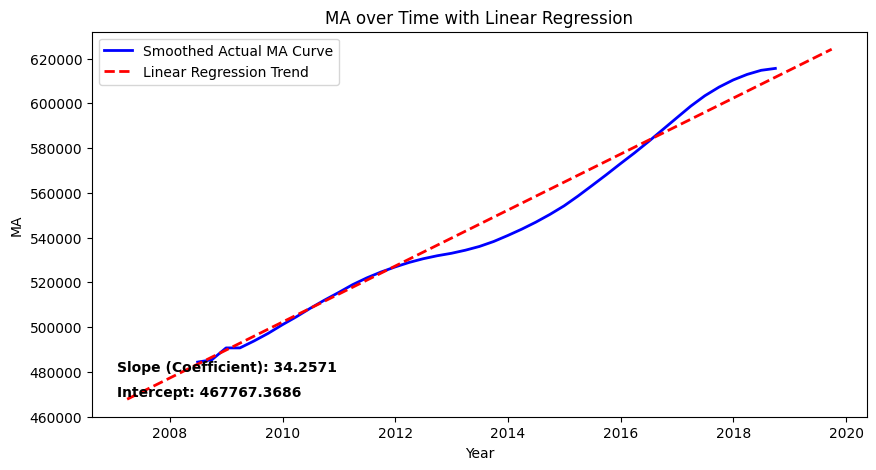

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("/content/ma_lga_12345.csv")

# Convert 'saledate' to datetime format
df['saledate'] = pd.to_datetime(df['saledate'], format="%d/%m/%Y")

# Aggregate data to ensure only one fluctuating curve
df = df.groupby('saledate', as_index=False)['MA'].mean()

# Convert dates into numerical values for regression
df['days_since_start'] = (df['saledate'] - df['saledate'].min()).dt.days
X = df[['days_since_start']]
y = df['MA']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)
y_linear_pred = model.predict(X)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_

# Smooth the actual MA values for a cleaner fluctuating curve
df['smoothed_MA'] = df['MA'].rolling(window=10, center=True).mean()

# Plot the fluctuating actual MA curve (BLUE)
plt.figure(figsize=(10, 5))
plt.plot(df['saledate'], df['smoothed_MA'], color='blue', linewidth=2, label="Smoothed Actual MA Curve")

# Plot the linear regression trend line (RED DASHED)
plt.plot(df['saledate'], y_linear_pred, color='red', linewidth=2, linestyle="dashed", label="Linear Regression Trend")

# Labels and title
plt.xlabel("Year")
plt.ylabel("MA")
plt.title("MA over Time with Linear Regression")
plt.legend()

# Display slope and intercept
plt.figtext(0.15, 0.2, f"Slope (Coefficient): {slope:.4f}", fontsize=10, fontweight="bold")
plt.figtext(0.15, 0.15, f"Intercept: {intercept:.4f}", fontsize=10, fontweight="bold")

# Show plot
plt.show()
